In [1]:
import numpy as np
import matplotlib.pyplot as plt
import maad
from maad import sound, features, rois
from maad.util import power2dB, plot2d, format_features, overlay_rois

In [15]:
s_slice, fs = maad.sound.load('/Users/ernestocediel/OneDrive - Universidad de los Andes/MSDS/DATA 590 Capstone I & II/ravenpro_test/buzz/20210910_030000_time1220_HFbuzz_LF.wav')#/Users/ernestocediel/OneDrive - Universidad de los Andes/MSDS/DATA 590 Capstone I & II/ravenpro_test/20221012_030000.WAV

#s_slice = maad.sound.trim(s, fs, min_t = 45, max_t = 55)



/opt/anaconda3/envs/transformer4batsss/lib/python3.9/site-packages/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


In [31]:
fs

250000

In [12]:
maad.sound.write('/Users/ernestocediel/OneDrive - Universidad de los Andes/MSDS/DATA 590 Capstone I & II/ravenpro_test/20221012_030000_1min.WAV', fs, s_slice, bit_depth=32)

In [5]:
s_slice, fs = maad.sound.load('/Users/ernestocediel/OneDrive - Universidad de los Andes/MSDS/DATA 590 Capstone I & II/ravenpro_test/temp_folder/20221012_030000_1min.WAV')


(<AxesSubplot: title={'center': 'ROIs Overlay'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 394.353x2595.12 with 2 Axes>)

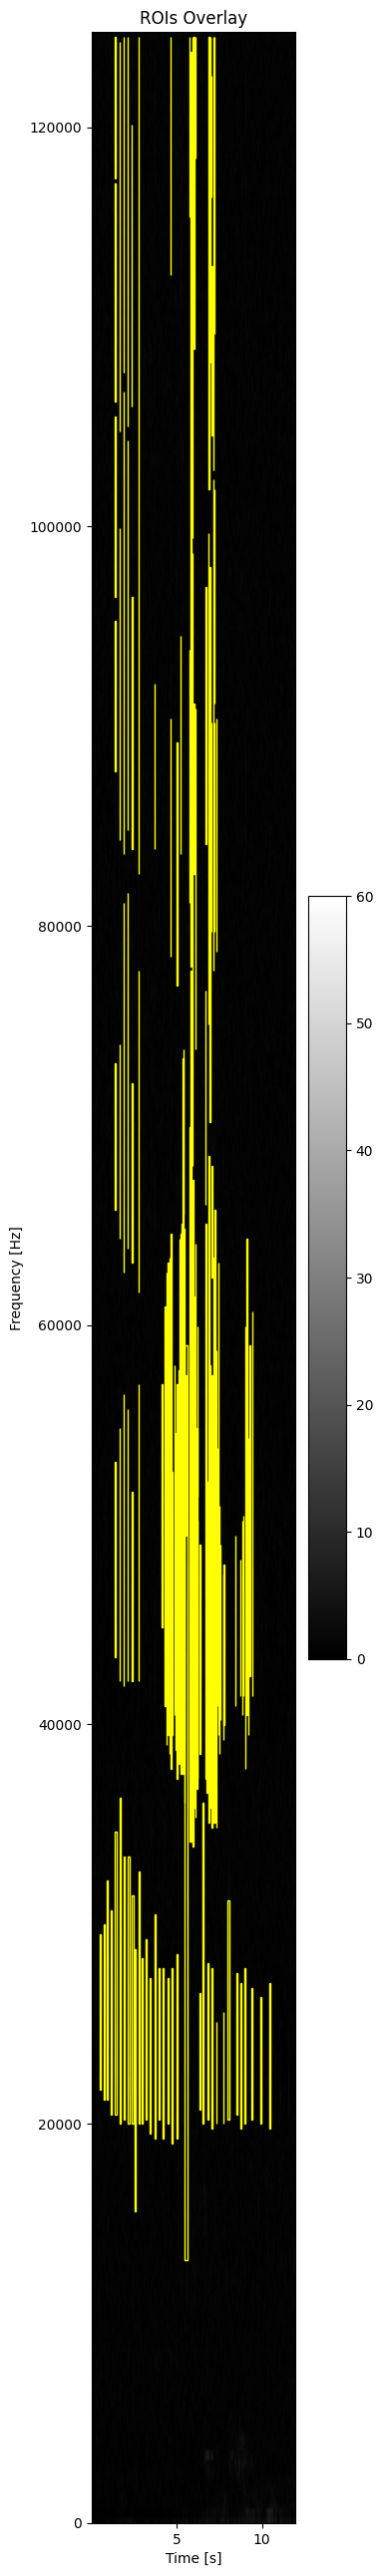

In [14]:
Sxx,tn,fn,ext = maad.sound.spectrogram (s_slice, fs)   
Sxx_noNoise = maad.sound.median_equalizer(Sxx)
Sxx_noNoise_dB = maad.util.power2dB(Sxx_noNoise)         
Sxx_noNoise_dB_blurred = maad.sound.smooth(Sxx_noNoise_dB)
im_bin = maad.rois.create_mask(Sxx_noNoise_dB_blurred, bin_std=6, bin_per=0.5, mode='relative') 
import numpy as np
im_rois, df_rois = maad.rois.select_rois(im_bin, min_roi=100)  
# Format ROIs and visualize the bounding box on the audio spectrogram.
df_rois = format_features(df_rois, tn, fn)
maad.util.overlay_rois (Sxx_noNoise_dB, df_rois, extent=ext,vmin=np.median(Sxx_noNoise_dB), vmax=np.median(Sxx_noNoise_dB)+60)

In [16]:
df_shape, params = features.shape_features(Sxx_noNoise_dB, resolution='low', rois=df_rois)
df_centroid = features.centroid_features(Sxx_noNoise_dB, df_rois)
# Get median frequency and normalize
median_freq = fn[np.round(df_centroid.centroid_y).astype(int)]
df_centroid['centroid_freq'] = median_freq/fn[-1]

/opt/anaconda3/envs/transformer4batsss/lib/python3.9/site-packages/maad/features/shape.py:343: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im_pyr = tuple(transform.pyramid_gaussian(Sxx, downscale=2,
/opt/anaconda3/envs/transformer4batsss/lib/python3.9/site-packages/maad/features/shape.py:359: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im = transform.rescale(im, scale = ratio, mode='reflect',


[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 140 samples in 0.000s...
[t-SNE] Computed neighbors for 140 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 140 / 140
[t-SNE] Mean sigma: 0.169709
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.388077
[t-SNE] KL divergence after 1000 iterations: 0.346928


Text(0, 0.5, 'tsne dim 2')

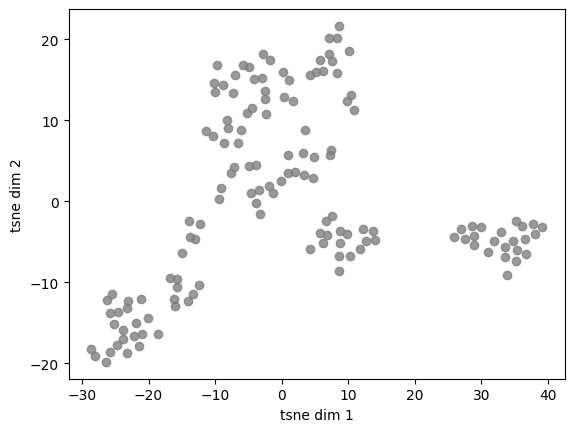

In [17]:
from sklearn.manifold import TSNE

X = df_shape.loc[:,df_shape.columns.str.startswith('shp')]
X = X.join(df_centroid.centroid_freq) # add column and normalize values

tsne = TSNE(n_components=2, perplexity=12, init='pca', verbose=True)
Y = tsne.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c='gray', alpha=0.8)
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')

In [19]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=5, min_samples=4).fit(Y)
print('Number of soundtypes found:', np.unique(cluster.labels_).size)

Number of soundtypes found: 3


NameError: name 'Sxx_db' is not defined

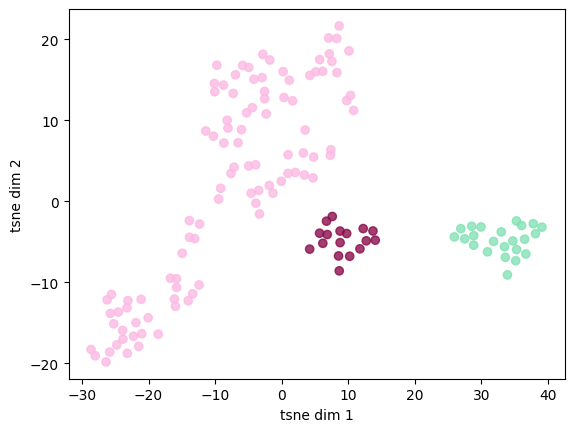

In [20]:
from maad.util import rand_cmap
fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c=cluster.labels_, cmap=rand_cmap(5 , first_color_black=False), alpha=0.8)
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')

# Overlay bounding box on the original spectrogram
df_rois['label'] = cluster.labels_.astype(str)
ax0, fig0 = overlay_rois(Sxx_db, df_rois, **{'vmin':0, 'vmax':60, 'extent':ext})

In [2]:
s, fs = maad.sound.load('/Users/ernestocediel/OneDrive - Universidad de los Andes/MSDS/DATA 590 Capstone I & II/ravenpro_test/20221012_030000.WAV')
s_slice = maad.sound.trim(s, fs, min_t = 0, max_t = 60)

AttributeError: module 'maad.sound' has no attribute 'trim'

In [3]:
fs

192000

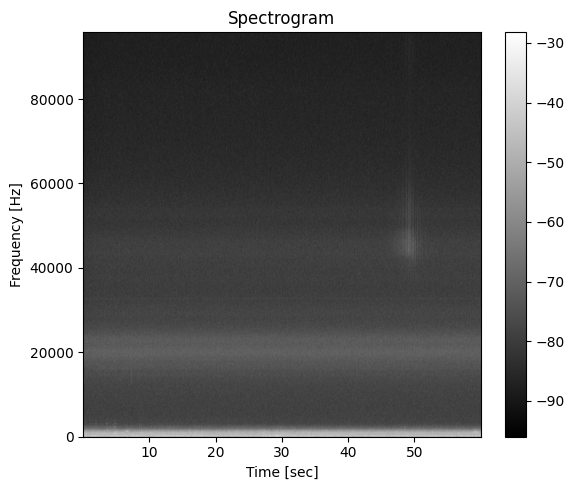

(array([[9.30967873e-05, 9.50795331e-06, 1.02516828e-05, ...,
         3.44491803e-05, 3.89166896e-05, 2.00192041e-05],
        [1.63721187e-04, 6.39016527e-06, 4.98363913e-05, ...,
         6.42597030e-05, 1.37959815e-04, 1.35692585e-04],
        [9.91496869e-05, 6.05974962e-06, 1.71076213e-05, ...,
         5.91609470e-05, 9.20138972e-05, 1.86623252e-05],
        ...,
        [3.23041035e-09, 8.37058505e-10, 1.23683309e-09, ...,
         5.95431076e-09, 2.78390792e-11, 1.26955056e-08],
        [2.92372236e-09, 4.32434370e-09, 7.98811107e-11, ...,
         2.27991083e-10, 2.87413033e-09, 1.02343416e-08],
        [5.27600351e-11, 3.77393766e-09, 8.41140637e-10, ...,
         3.75319250e-09, 9.15266165e-09, 3.44285328e-09]]),
 array([2.66666667e-03, 5.33333333e-03, 8.00000000e-03, ...,
        5.99920000e+01, 5.99946667e+01, 5.99973333e+01]),
 array([    0. ,   187.5,   375. ,   562.5,   750. ,   937.5,  1125. ,
         1312.5,  1500. ,  1687.5,  1875. ,  2062.5,  2250. ,  2437.5,
    

In [7]:
maad.sound.spectrogram(s_slice, fs, display=True, figsize=(4,6))

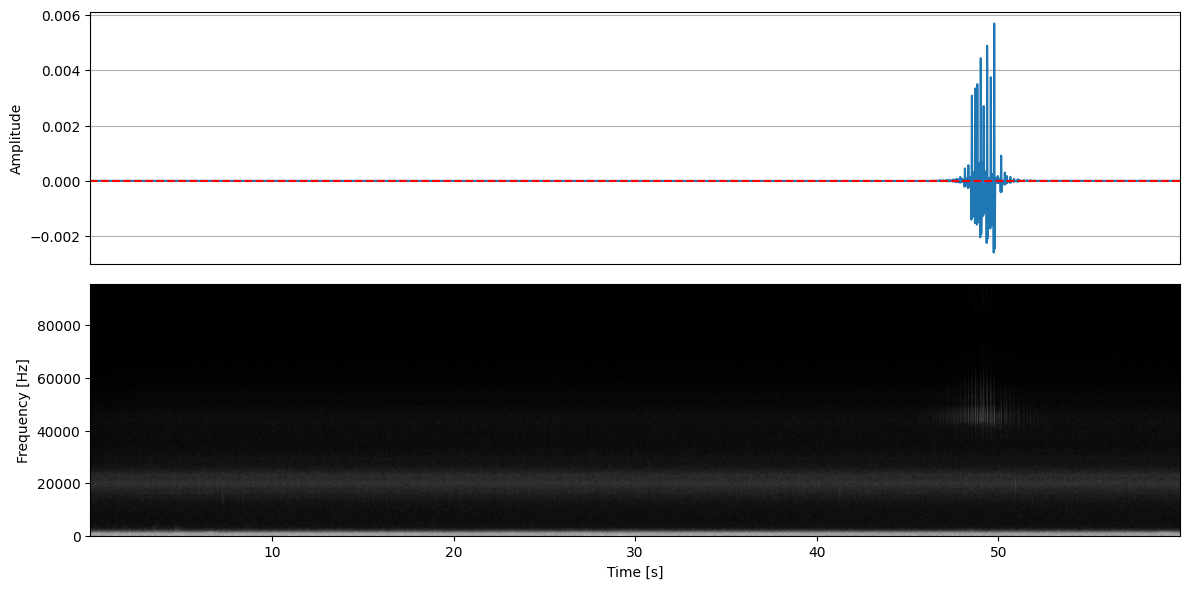

,min_f,min_t,max_f,max_t
0,38000.0,0.00000,81000.0,0.00933
1,38000.0,0.02267,81000.0,0.05067
2,38000.0,0.07467,81000.0,0.08800
3,38000.0,0.11200,81000.0,0.13067
4,38000.0,0.15733,81000.0,0.22800
...,...,...,...,...
1055,38000.0,59.77333,81000.0,59.79333
1056,38000.0,59.81733,81000.0,59.84133
1057,38000.0,59.86667,81000.0,59.89600
1058,38000.0,59.93200,81000.0,59.95600


In [8]:
maad.rois.find_rois_cwt(s_slice, fs, flims=(38000,81000), tlen=0.03, th=0, display=True)

(<AxesSubplot: title={'center': 'ROIs Overlay'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 394.353x2595.12 with 2 Axes>)

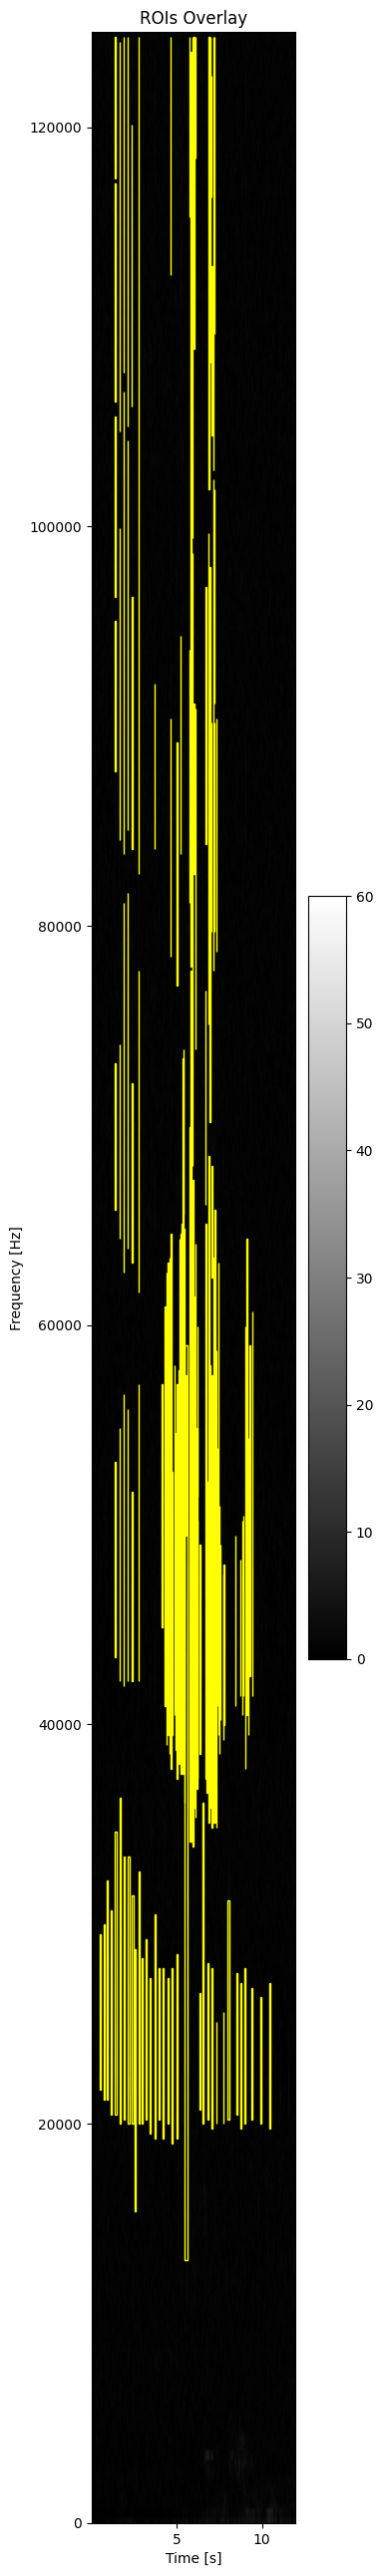

In [21]:
Sxx,tn,fn,ext = maad.sound.spectrogram (s_slice, fs, fcrop=(0,10000))   
Sxx_noNoise = maad.sound.median_equalizer(Sxx)
Sxx_noNoise_dB = maad.util.power2dB(Sxx_noNoise)         
Sxx_noNoise_dB_blurred = maad.sound.smooth(Sxx_noNoise_dB)
im_bin = maad.rois.create_mask(Sxx_noNoise_dB_blurred, bin_std=6, bin_per=0.5, mode='relative') 
import numpy as np
im_rois, df_rois = maad.rois.select_rois(im_bin, min_roi=100)  
maad.util.overlay_rois (Sxx_noNoise_dB, df_rois, extent=ext,vmin=np.median(Sxx_noNoise_dB), vmax=np.median(Sxx_noNoise_dB)+60) 

In [6]:
im_rois

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

/opt/anaconda3/envs/transformer4batsss/lib/python3.9/site-packages/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


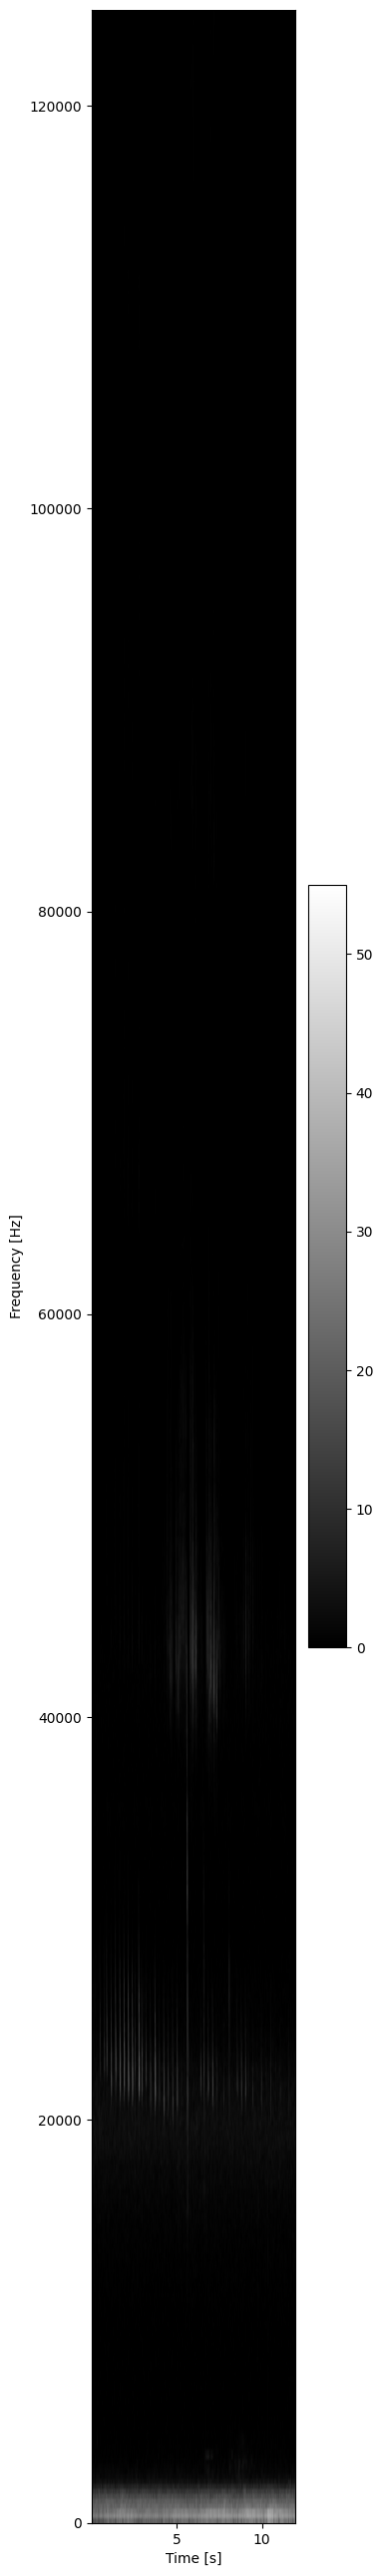

(<AxesSubplot: xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 394.353x2595.12 with 2 Axes>)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from maad import sound, features, rois
from maad.util import power2dB, plot2d, format_features, overlay_rois

s, fs = sound.load('/Users/ernestocediel/OneDrive - Universidad de los Andes/MSDS/DATA 590 Capstone I & II/ravenpro_test/buzz/20210910_030000_time1220_HFbuzz_LF.wav')
s_filt = sound.select_bandwidth(s, fs, fcut=100, forder=3, ftype='highpass')

db_max=70  # used to define the range of the spectrogram
Sxx, tn, fn, ext = sound.spectrogram(s_filt, fs, nperseg=1024, noverlap=512)
Sxx_db = power2dB(Sxx, db_range=db_max) + db_max
plot2d(Sxx_db, **{'extent':ext})

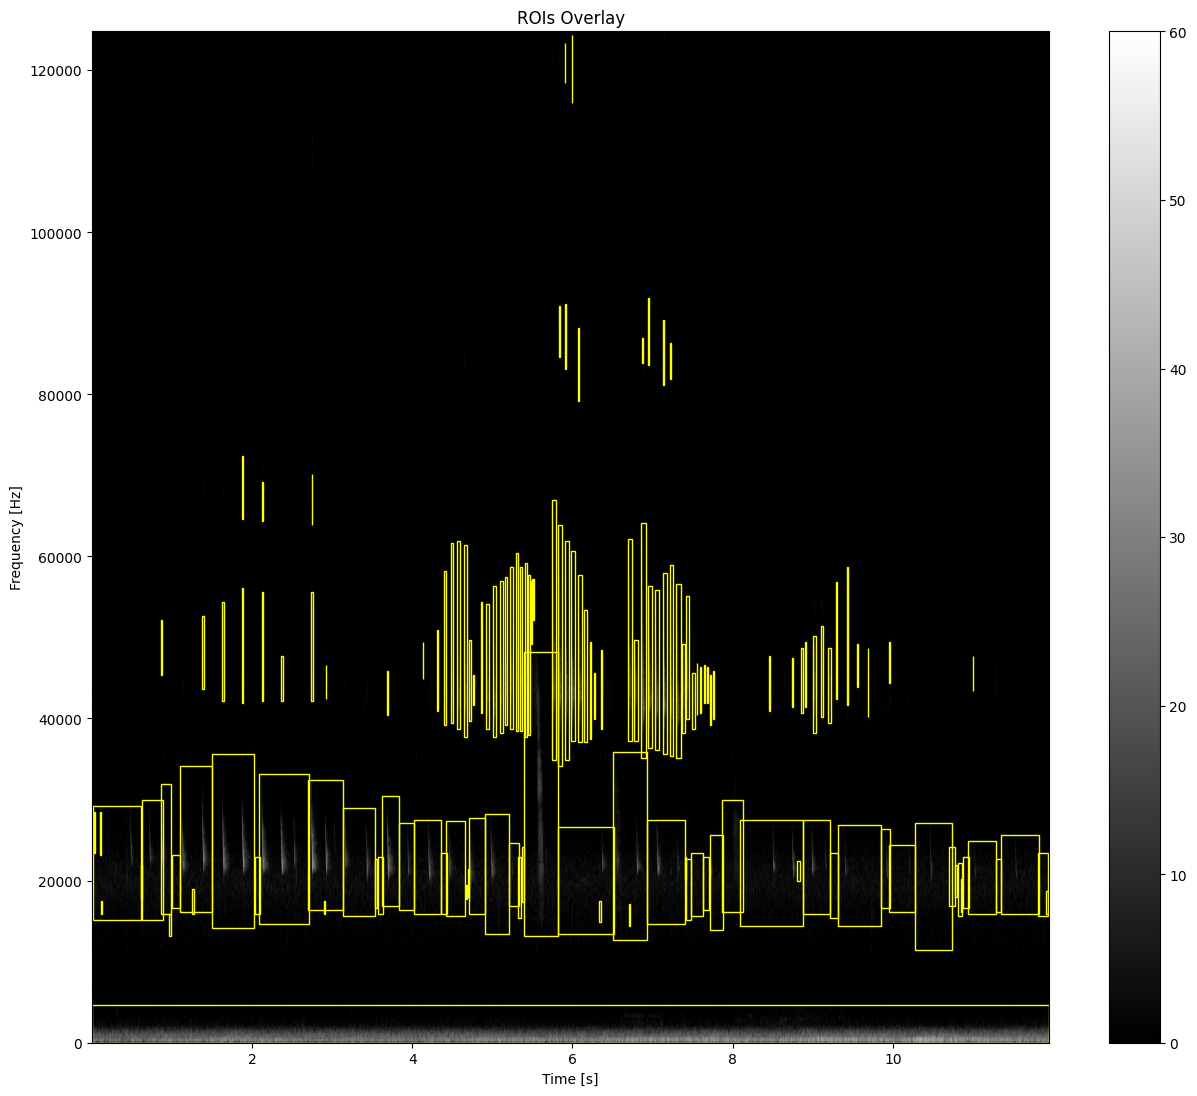

In [30]:
Sxx_db_rmbg, _, _ = sound.remove_background(Sxx_db)
Sxx_db_smooth = sound.smooth(Sxx_db_rmbg, std=1.2)
im_mask = rois.create_mask(im=Sxx_db_smooth, mode_bin ='relative', bin_std=2, bin_per=0.25)
im_rois, df_rois = rois.select_rois(im_mask, min_roi=50, max_roi=None)

# Format ROIs and visualize the bounding box on the audio spectrogram.
df_rois = format_features(df_rois, tn, fn)
ax0, fig0 = overlay_rois(Sxx_db, df_rois, **{'vmin':0, 'vmax':60, 'extent':ext})
fig0.set_size_inches(18.5, 10.5, forward=True)

In [24]:
df_shape, params = features.shape_features(Sxx_db, resolution='low', rois=df_rois)
df_centroid = features.centroid_features(Sxx_db, df_rois)

# Get median frequency and normalize
median_freq = fn[np.round(df_centroid.centroid_y).astype(int)]
df_centroid['centroid_freq'] = median_freq/fn[-1]

/opt/anaconda3/envs/transformer4batsss/lib/python3.9/site-packages/maad/features/shape.py:343: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im_pyr = tuple(transform.pyramid_gaussian(Sxx, downscale=2,
/opt/anaconda3/envs/transformer4batsss/lib/python3.9/site-packages/maad/features/shape.py:359: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im = transform.rescale(im, scale = ratio, mode='reflect',


[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 143 samples in 0.000s...
[t-SNE] Computed neighbors for 143 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 143 / 143
[t-SNE] Mean sigma: 0.049373
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.866512
[t-SNE] KL divergence after 1000 iterations: 0.252168


Text(0, 0.5, 'tsne dim 2')

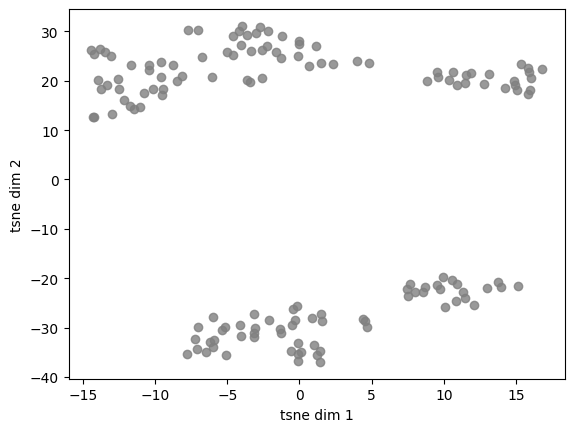

In [25]:
from sklearn.manifold import TSNE

X = df_shape.loc[:,df_shape.columns.str.startswith('shp')]
X = X.join(df_centroid.centroid_freq) # add column and normalize values

tsne = TSNE(n_components=2, perplexity=12, init='pca', verbose=True)
Y = tsne.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c='gray', alpha=0.8)
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')

In [26]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=5, min_samples=4).fit(Y)
print('Number of soundtypes found:', np.unique(cluster.labels_).size)

Number of soundtypes found: 4


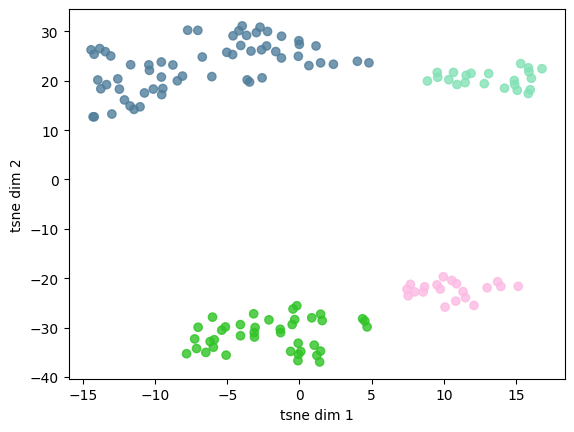

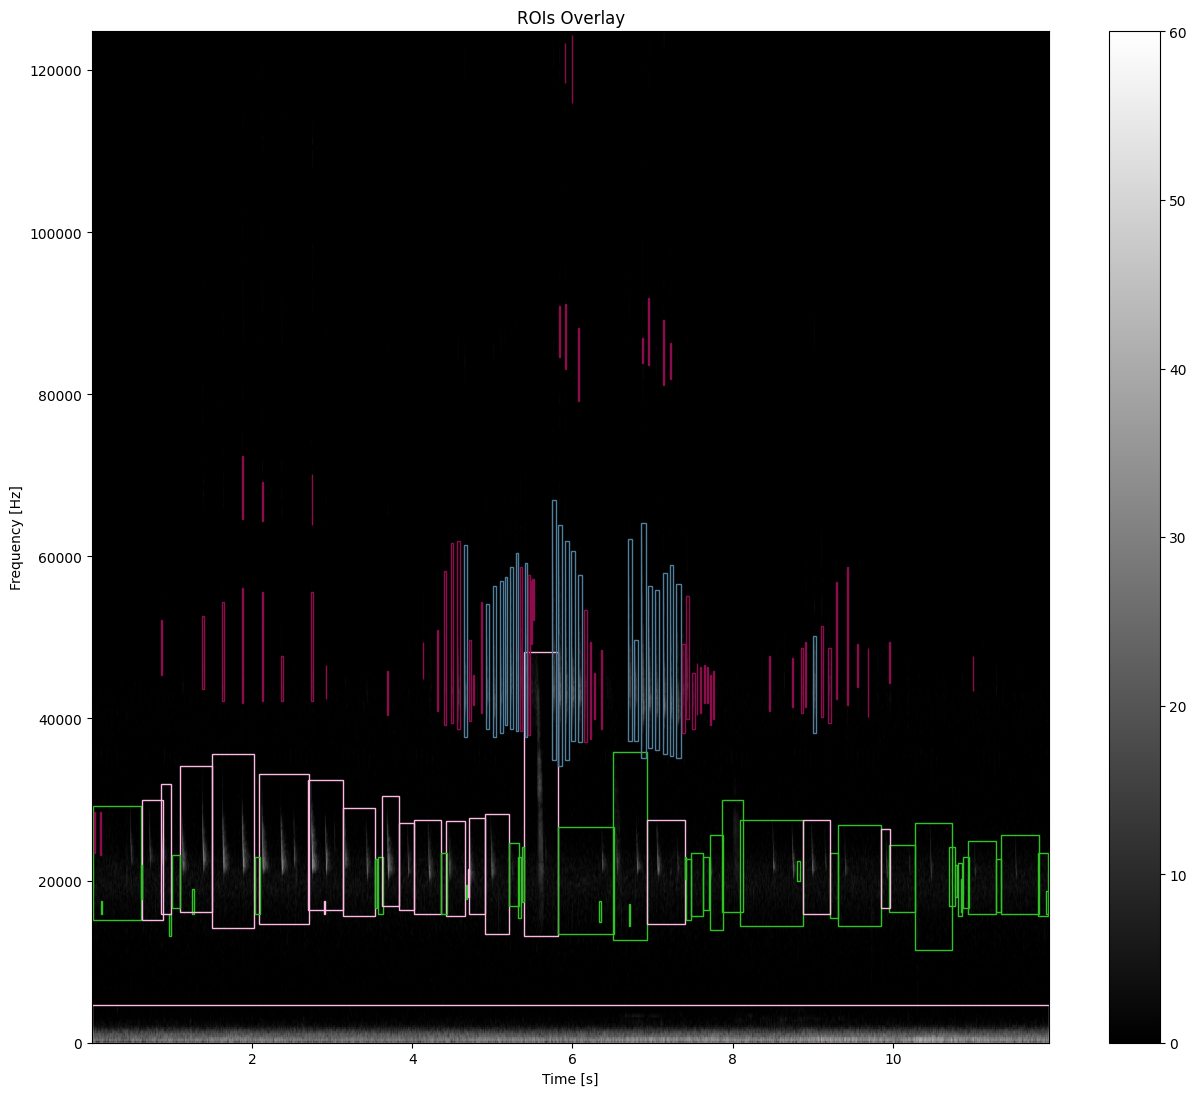

In [29]:
from maad.util import rand_cmap

fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c=cluster.labels_, cmap=rand_cmap(5 , first_color_black=False), alpha=0.8)
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')

# Overlay bounding box on the original spectrogram
df_rois['label'] = cluster.labels_.astype(str)
ax0, fig0 = overlay_rois(Sxx_db, df_rois, **{'vmin':0, 'vmax':60, 'extent':ext})
fig0.set_size_inches(18.5, 10.5, forward=True)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from maad import sound, util
from maad import sound, features, rois
from maad.sound import (load, spectrogram,
                       remove_background, median_equalizer,
                       remove_background_morpho,
                       remove_background_along_axis, sharpness)

In [6]:
PATH_AUDIO = '/Users/ernestocediel/OneDrive - Universidad de los Andes/MSDS/DATA 590 Capstone I & II/ravenpro_test/20210910_033000.WAV'
s, fs = sound.load(PATH_AUDIO)
s_slice = sound.trim(s, fs, min_t = 1390, max_t = 1460)

In [8]:
sound.write('/Users/ernestocediel/OneDrive - Universidad de los Andes/MSDS/DATA 590 Capstone I & II/ravenpro_test/20210910_033000_select.WAV', fs, s_slice,bit_depth = 16)